# Measuring the Importance of Nodes in Networks

We are going to look at ways of using the structure of a network to determine computationally which of its nodes are most important --- that is, which are most able to influence others or control how information flows.

We will use jupyter notebooks for this exercise.  The code is python.  No previous knowledge is assumed.

The notebooks can be found at

http://www.dur.ac.uk/matthew.johnson2/summerschools2020.html

Try to work through the exercises in this worksheet as much as you can.  Return to the website to find videos of me working through it and notebooks where the work has been done.

To execute the code in these notebooks and see the output, click on the cell and then use shift+enter.  

A very simple test -- execute the code in the cell below.

In [1]:
print ("Welcome to Durham")

Welcome to Durham


Note that some of the instructions below are labelled TASK 1, TASK 2 etc.  If you get stuck, you can find videos on the website of me working through the sheet up to each task and obtain versions of this notebook that are partially completed.

Let's start by defining Network1 in the handout (this is the file handout.pdf on the website).  We will do this with the following code that includes, for each node, a list of the nodes that it links to. 

(You don't need to worry about the details of the code, but if you are familiar with python you will recognize that first line is importing a function called DiGraph from the package networkx.  DiGraph, a contraction of Directed Graph, is just another work for network.)

So go to the cell below and execute the code (shift + enter).

In [2]:
from networkx import DiGraph

Network1 = DiGraph({"A": ["B", "C"], 
                    "B": ["D", "E"], 
                    "C": [],
                    "D": ["A"], 
	                "E": ["A"]})

Notice that there was no output; all you did was create Network1.  

So now execute the following code to draw Network1 and compare with the handout.  

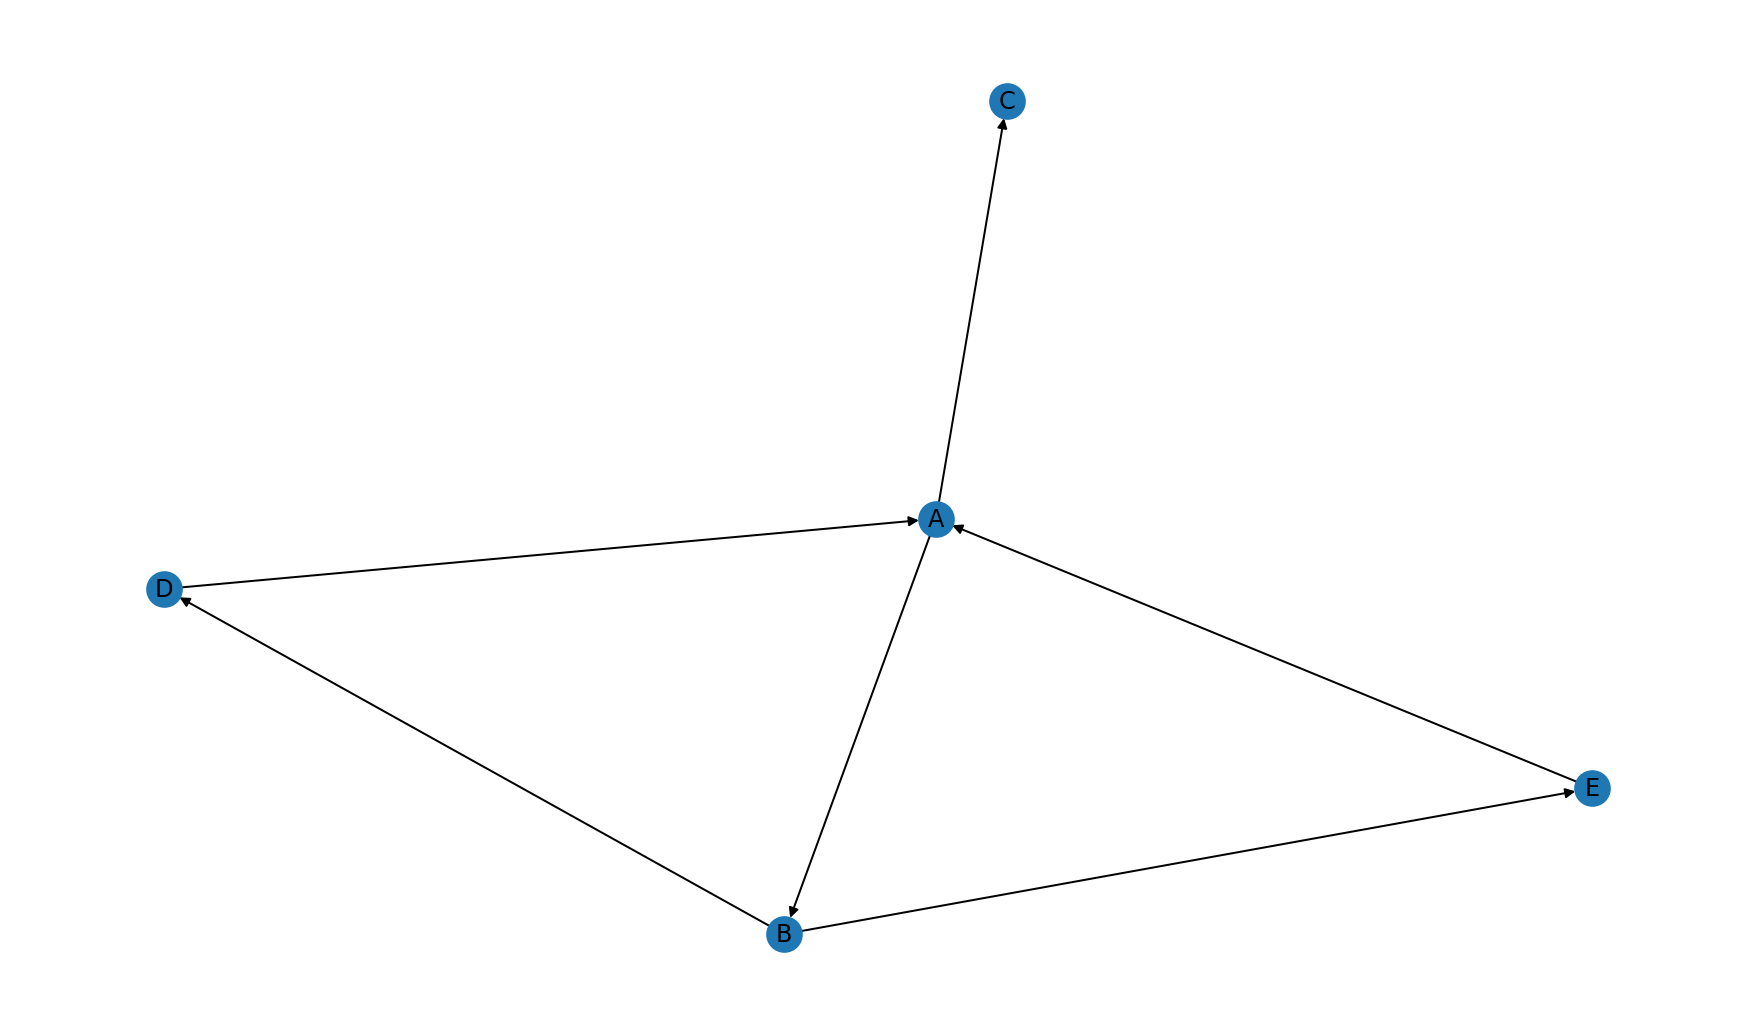

In [3]:
from networkx import draw
import matplotlib.pyplot as plt

draw(Network1, with_labels=True)
plt.show()

So now you can see how to define and draw networks.

Test this by creating and drawing Network2 and Network3.  Just copy and paste the code for Network 1 and then edit it.

In [4]:
#TASK 1

#insert code to define Network2 below (when you execute this cell, this line will be ignored as it begins with the # symbol)

Network2 = DiGraph({"A": ["B", "C"], 
                    "B": ["D", "E"], 
                    "C": [],
                    "D": ["A"], 
	                "E": ["A"],
                    "F": ["D"],
                    "G": ["A", "C","H"],
                    "H": ["D","I"],
                    "I": ["A","F"]})



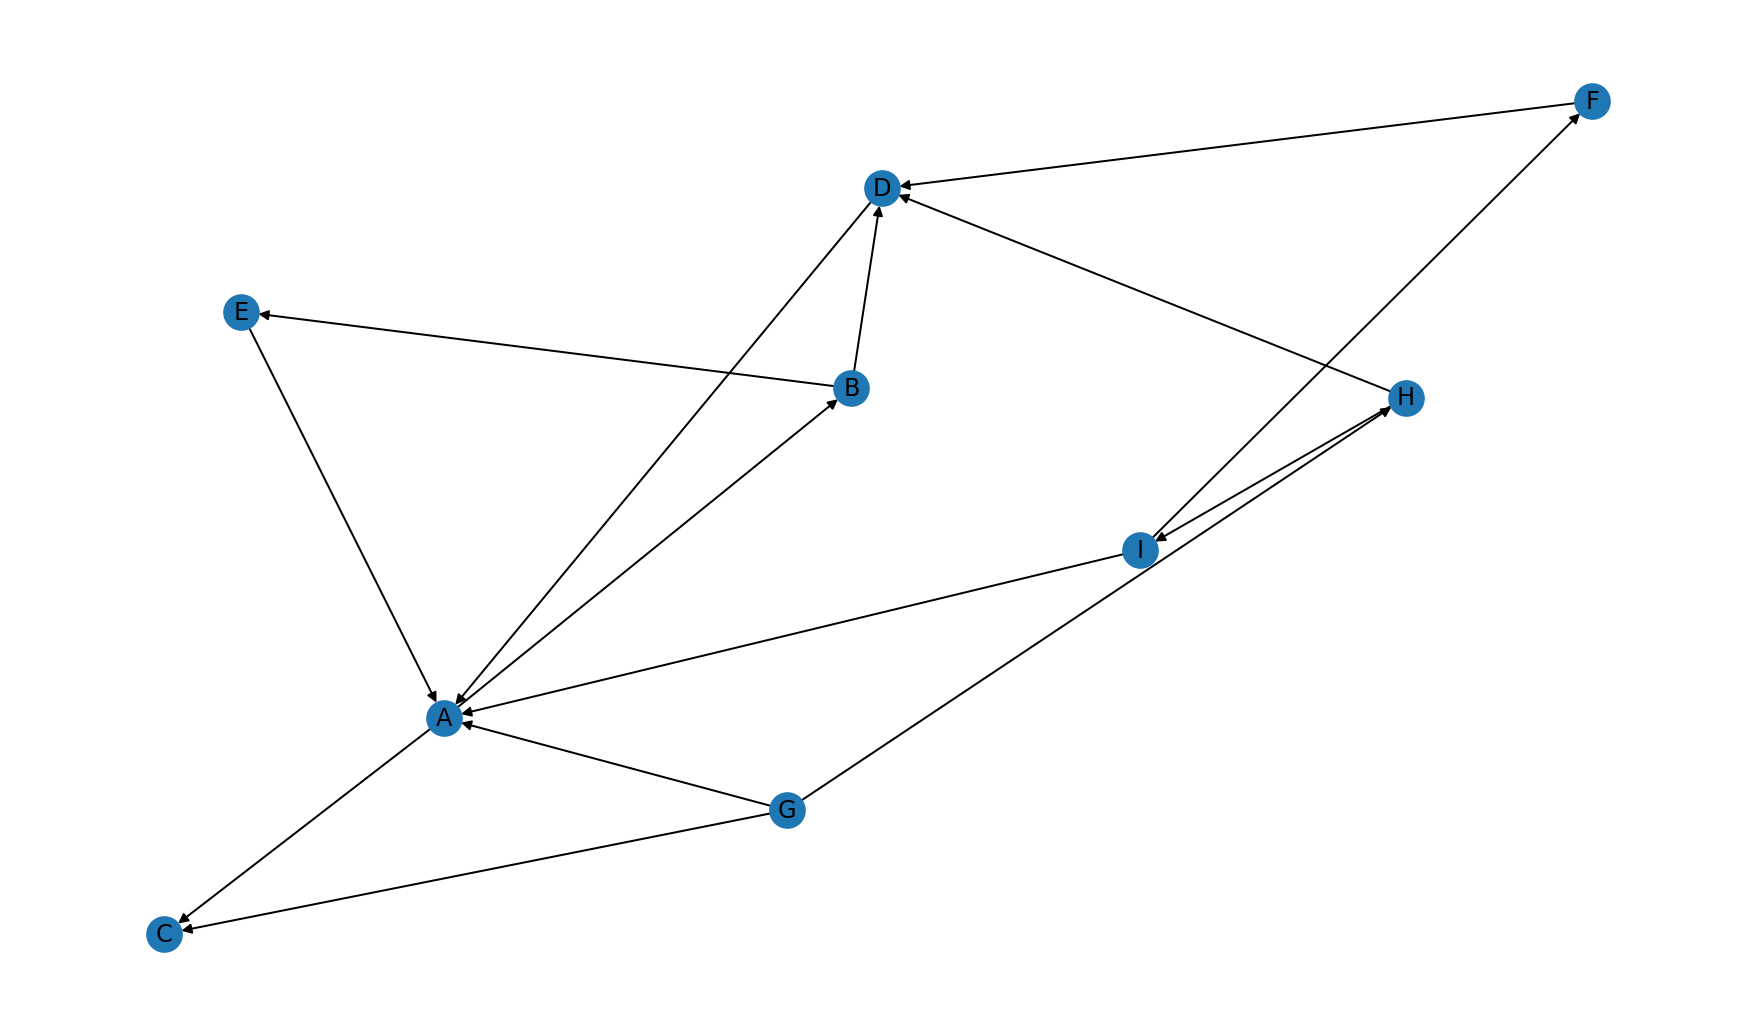

In [5]:
#execute this cell to draw Network2 and check that you have defined it correctly
draw(Network2, with_labels=True)
plt.show()

In [0]:
#insert code to define Network3 below 






In [0]:
#execute this cell to draw Network3 and check that you have defined it correctly
draw(Network3, with_labels=True)
plt.show()

In [0]:
#in case you are unsure, here is my definition and drawing of Network3 

Network3 = DiGraph({"A": ["B", "C"], 
                    "B": ["D", "E"], 
                    "C": ["F", "G"], 
	                "D": ["A", "H"], 
	                "E": ["A", "H"], 
	                "F": ["G"], 
	                "G": ["F"], 
	                "H": ["A"], 
	                "I": ["A"], 
	                "J": ["I"],
                    "K": ["J"],
                    "L": ["K", "R"],
                    "M": ["L", "N"],
                    "N": ["M"],
                    "O": ["M"],
                    "P": ["M"],
                    "Q": ["M"],
                    "R": []})

draw(Network3, with_labels=True)
plt.show()

Let's look at how, once we have defined a network, we can discover some of its properties.  To start with, the following line of code will list the nodes.

In [0]:
Network1.nodes()

If we just want to know how many nodes there are we just the function len.  (read len as an abbreviation for length)

In [0]:
len(Network1.nodes())

Similarly we can find all the links -- in fact, we refer to links as edges.

In [0]:
Network1.edges()

We can find the neighbours of a node (with code that is a little less intuitive ).  Let's look at two examples.

In [0]:
list(Network1.neighbors('A'))

In [0]:
list(Network1.neighbors('B'))

Note that B is a neighbour of A, but A is not a neighbour of B.  This is because the link goes *from* A *to* B (and there is no link that goes *from* B *to* A).

We can also use the following two pieces of code. 

In [0]:
list(Network1.successors('A'))

In [0]:
list(Network1.successors('B'))

These are equivalent so, in fact, we will use successors as it gives some indication of what is meant -- the successors of A are the nodes that can be reached by following a link from A.  (But if you do any reading you find the term neighbour is often used.)

What if instead we want to know which nodes link to A?  That is, for which nodes can we find a link that goes from that node to A?  For this we can use the following code.

In [0]:
list(Network1.predecessors('A'))

A short test of your understanding.  What are the successors and predecessors of node B in each of the three example networks?  Say what you think looking at the handout, and then write code to confirm this.  

Note that if you want to insert an extra cell at any time just press Alt+Enter and this will create a new cell below the current cell.

Now let's start to think about how to measure the influence of nodes.  We will use Network3 for our examples.

The idea is to assign each node a 'score' --- a positive number --- such that the most important nodes receive the highest scores.  Before we think about what this score should be, let's describe the process in outline.

We need to look at each node in turn, and for each node perform some calculation.  What we need is a 'for loop'.  Here is a simple example.

In [0]:
score = {}
for node in Network3.nodes():
    score[node] = 1

Look back at the three lines of code above.  
The first line creates a *data structure* called score (it is what python calls a *dictionary* and is initially empty).  
Then the second line says consider in turn each node in Network3, and, for each node, do whatever is written on the indented lines below.  
The last line assigns the score 1 to the node.

We can see what we have done by printing the data structure score.

In [0]:
print (score)

That isn't too easy to read.   The following code prints on separate rows the name of each node and its score.

In [0]:
for node in Network3.nodes():
    print ("%s: %s" % (node, score[node]))

Even better would be to draw the network and label the nodes with their scores.  
The code below creates a function draw_Network3 that will draw Network3 labelled with the nodes' scores (something we will want to do repeatedly).  Execute the cell to see the output.

In [0]:
node_positions = {"A": [0, 4], "B": [-2, 2], "C": [2, 2], "D": [-5, 1.5], 
                    "E": [-1, 0], "F": [1.7, 0], "G": [4, 1.5], 
                    "H": [0, -2], "I": [2.5, 4], "J": [5, 4],
                    "K": [7, 4], "L": [7, 2], "M": [7, 0], 
                    "N": [5, -2], "O": [5.8, -3], "P": [7.2, -3],
                    "Q": [8,-2], "R": [9, 3]}

def draw_Network3():
    labeldict = {}
    for node in Network3.nodes():
        labeldict[node] = node + ": " + str(round(score[node],1))
    plt.figure(figsize=(15,10)) 
    draw(Network3, node_positions, labels = labeldict, with_labels=True, 
         font_size=16, node_size=3000, node_color="w", edgecolors="b", linewidths=2)
    plt.show()
    

draw_Network3()

We need to refine how we calculate the scores so that we get more meaningful values.

Here is the outline code.

```python
score = {}  
for node in Network3.vertices():  
    score[node] = 1
```

So all we need to do is replace the final line with something more meaningful.  

Think about what this abstract network might represent.  
There are many systems that can be represented in this way, but so that we have something concrete to think of let us suppose it is a set of webpages and the hyperlinks between them.

What does it mean for one website to link to another?  
Well, if there is a hyperlink from A to B, perhaps it means the author of A thinks B is worth reading; that is, the hyperlink is a recommendation, an expression of approval.  
So if lots of websites all link to the same page, that would suggest that is a *good* page, a page that should be given a high score.

As a first attempt of using this idea, let's just say that the score of a node is the number of nodes that link to it; that is the number of predecessors (using the terminology introduced above).  
So can you edit the code below so that the score assigned to each node is just the number of predecessors.  
So A should get a score of 4 for example, and for B it should be 1.

In [0]:
#TASK 2

score = {}
for node in Network3.nodes():
    score[node] = #YOUR CODE HERE
    
#draw the network to check your answer
draw_Network3()

Below is the code you should have come up with.  Make sure you understand why this gives the scores we want.

In [0]:
score = {}
for node in Network3.nodes():
    score[node] = len(list(Network3.predecessors(node)))
    
draw_Network3()

Let's think how to refine 'score' further.  
One way to the think of the *algorithm* that we just wrote to calculate score is that each node gives a score of 1 to each of its successors.

Look at the node L in the picture above.  
It 'gives' a score of 1 to K and to R.  
So we might say that L contributes a total of 2 to the scores of other nodes.

Using the same reasoning how much does M contribute?  
What about A?  
Can we say, in general, how much score a node 'gives' to other nodes?

$~$

$~$

$~$

$~$

$~$

$~$

The answer is that the total score a node contributes is equal to the number of its successors.  
So for M it is 2 and for A it is also 2.

Suppose we want each node to contribute an equal amount --- let's say each node should give a total score of 1 to its neighbours, and when it has more than one neighbour it should divide this total equally between them.  

So M will give a score of 0.5 to L.  L will give a score of 0.5 to each of K and R, and so on.

So how will we calculate the score of each node?  
Let's think about node A.  Its score depends on its predecessors, D, E, H and I.  

D gives a score of 0.5 to A (because its total of 1 is divided between A and H).
H gives a score of 1 to A (because it only has one successor).

Can you complete the argument and say what the total score of A will be?

$~$

$~$

$~$

$~$

$~$

$~$

The total will be 3 because E will contribute 0.5 and I will also contribute 1.

Can you try to adapt the earlier code for score to calculate using this new approach?  
In the next cell is an outline.  See if you can complete it.

In [0]:
#TASK 3

score = {}
for node in Network3.nodes(): 
    #initially set the score of a node to zero
    score[node] = 0    
    
    #then look at each of predecessors
    for pred in  list(Network3.predecessors(node)):
        
        #for each predecessor increase the score of the node
        score[node] = score[node] + #YOUR CODE HERE

#draw the labelled network to test your code
draw_Network3()


$~$

$~$

$~$

$~$

$~$

$~$

Below is one way to complete the code.  Execute the cell and make sure you understand why each node has the score it does and why the code makes the correct calculation.

In [0]:
score = {}
for node in Network3.nodes():
    score[node] = 0
    for pred in  list(Network3.predecessors(node)):
        score[node] = score[node] + 1.0 / len(list(Network3.successors(pred)))

draw_Network3()

Does this correspond with your intuition of which nodes should receive the highest scores?

Consider M.  Four nodes link to M, but these nodes, N, O, P and Q, are very poor nodes in the sense that they themselves have low scores.  

Consider A.  The four nodes that link to A are quite good; at least, they have better scores than the nodes that link to M.

Shouldn't this mean that A has a better score than M?  They have the same number of predecessors but A has 'better quality' predecessors.

How can we incorporate this idea?  Below is the code from above.  Think about how you could alter it before reading on.  If you like, try to rewrite it for yourself.

In [0]:
#TASK 4

score = {}
for node in Network3.nodes():
    score[node] = 0
    for pred in  list(Network3.predecessors(node)):
        score[node] = score[node] + 1.0 / len(list(Network3.successors(pred)))

Below is an attempt to refine the score calculation.  
The only change is in the last line 1.0 is replaced by the score of the predecessor.   
So now the score of the node depends on the *quality* of its predecessors, just as we wanted.


In [0]:
#when you execute this code you will get an error message --- what have we done wrong?

score = {}
for node in Network3.nodes():
    score[node] = 0
    for pred in  list(Network3.predecessors(node)):
        score[node] = score[node] + score[pred] / len(list(Network3.successors(pred)))
        
draw_Network3() 

The problem is that score of A depends on the scores of its predecessors.    
So the score of A depends on the score of D which depends on the score of B which depends on the score of A -- a circular definition.    
Whichever score we try to calculate first, we will get stuck.

But we can make it work by just giving every node an *initial* score --- let's say 1.

```python
intl_sc = {} 
for node in Network3.nodes(): 
    intl_sc[node] = 1
```    
    
Then we use these initial scores to calculate some *interim* scores.

```python
intrm_sc={}
for node in Network3.nodes():
    intrm_sc[node] = 0
    for pred in  list(Network3.predecessors(node)):
        intrm_sc[node] += intl_sc[pred] / len(list(Network3.successors(pred)))
```

Then we use these interim scores to calculate the final scores.


```python
score = {}
for node in Network3.nodes():
    score[node] = 0
    for pred in  list(Network3.predecessors(node)):
        score[node] += intrm_sc[pred] / len(list(Network3.successors(pred)))
```
        
This code is all together in the next cell.
What do you expect the scores to be?        

In [0]:
intl_sc = {} 
for node in Network3.nodes(): 
    intl_sc[node] = 1

intrm_sc={}
for node in Network3.nodes():
    intrm_sc[node] = 0
    for pred in  list(Network3.predecessors(node)):
        intrm_sc[node] += intl_sc[pred] / len(list(Network3.successors(pred)))
score = {}
for node in Network3.nodes():
    score[node] = 0
    for pred in  list(Network3.predecessors(node)):
        score[node] += intrm_sc[pred] / len(list(Network3.successors(pred)))

draw_Network3()

(Note that the in the drawing of the network numbers are rounded to one decimal place.  This is enough for our purposes (though if you wanted, you could look back at code for the draw_Network3() function and see if you can edit it)).

Before we think about this newest approach has worked, let's see if we can improve the code.    
The calculation of the interim score and the final score are identical in format.   
So can we create the code to do the calculation and then use it twice?

What we need is a function --- let's call it update.    
The input to this is a set of 'old scores'  (which might be intl_score or intrm_score) and the output is a set of updated new scores (we use the return command to stipulate the output).

```python
def update(oldscore):
    newscore = {}
    for node in Network3.nodes():
        newscore[node] = 0
        for pred in  list(Network3.predecessors(node)):
            newscore[node] += oldscore[pred] / len(list(Network3.successors(pred)))
    return newscore
```

Below we just repeat the last calculation but now use this update function.

In [0]:
def update(oldscore):
    newscore = {}
    for node in Network3.nodes():
        newscore[node] = 0
        for pred in  list(Network3.predecessors(node)):
            newscore[node] += oldscore[pred] / len(list(Network3.successors(pred)))
    return newscore

intl_sc = {} 
for node in Network3.nodes(): 
    intl_sc[node] = 1
intrm_sc = update(intl_sc)
score = update(intrm_sc)

draw_Network3() 

And we can make things a little neater still by noticing that once we have intrm_sc we don't need the intl_sc again, and once we have score we don't need intrm_sc.    
As we don't need to remember any of the old scores once they are updated, they can all be given the same name.   
The next cell repeats the calculation once more.

In [0]:
score = {} 
for node in Network3.nodes(): 
    score[node] = 1
score = update(score)
score = update(score)

draw_Network3()

Now our code is easier to read, let's look at the output.    
We now see A has the highest score which does seem to make sense.

But there are some odd features -- the only link to L is from M so wouldn't we expect L not to have a score greater than M if our assumption is that the score of nodes depends on the scores of the nodes that link to them.

The problem is that the score of L depends on the interim value of M not on its final score.

So isn't the obvious solution to update again -- to find a new score for L dependent on the updated score of M

So lets rewrite what had above but with one further recalculation of scores.    
We could write:

```python
score = {} 
for node in Network3.nodes(): 
    score[node] = 1
score = update(score)
score = update(score)
score = update(score)
```

but writing the same thing three times is not efficient.    
Instead, in the next cell, we use a for loop.     
The code 'for i in range 3' just says count to 3 and do whatever is on the next line each time (strictly speaking it says count 0, 1, 2).



In [0]:
score = {} 
for node in Network3.nodes(): 
    score[node] = 1
for i in range(3):
    score = update(score)

draw_Network3()

We have a similar problem.   
R has a higher score than L because the score of R depends on L after two updates, but the third and final update gives L a lower score.

The answer is the same --- update the score once more.  
But we will keep having problems --- go back to the previous box and try different numbers of updates (by replacing the 3 with larger numbers).     
So we update more and more until we have something such as:

In [0]:
score = {} 
for node in Network3.nodes(): 
    score[node] = 1
for i in range(20):
    score = update(score)

draw_Network3()

This hasn't worked well at all; the problem is that the score is 'flowing' around the network along the links and each time we update some of it flows from C to F and G and no score ever flows away from F and G so they ultimately have all the score.

To get around this we can make the updated scores depend only *partially* on incoming links

Compare the new update function below to the older definition: what has changed?

```python
def new_update(oldscore):
    newscore = {}
    for node in Network3.nodes():
        newscore[node] = 0.4
        for pred in  list(Network3.predecessors(node)):
            newscore[node] += 0.6 * oldscore[pred] / len(list(Network3.successors(pred)))
    return newscore
```

Below we repeat the previous calculation using this new function.

In [0]:
#TASK 5

def new_update(oldscore):
    newscore = {}
    for node in Network3.nodes():
        newscore[node] = 0.4
        for pred in  list(Network3.predecessors(node)):
            newscore[node] += 0.6 * oldscore[pred] / len(list(Network3.successors(pred)))
    return newscore

score = {} 
for node in Network3.nodes(): 
    score[node] = 1
for i in range(20):
    score = new_update(score)

draw_Network3()

This gives scores that coincide reasonably with our intuition (don't they?).  

If you want to experiment more, go back and change the initial definition of Network3 and see if the function still works well (remember to evaluate the cell once you have edited it). 

Try to refine the update procedure by editing the numbers 0.4 and 0.6 (these two numbers should always add up to 1).  Or test whether 20 updates are really needed.

The algorithm described is Google's PageRank that uses the structure of the web to determine the quality of webpages (PageRank is just one of hundreds of procedures used to find search results).

This article gives some more background.

http://www.wired.com/magazine/2010/02/ff_google_algorithm/

That is the end of this exercise.

Also email me during the week if you have any questions about the exercise.  Good luck!